In [3]:
import yfinance as yf
import pandas as pd

# Fetching Apple's stock data for 2022
aapl = yf.Ticker("AAPL")
data_2022 = aapl.history(start="2022-12-12", end="2023-12-12")

# Extracting the closing price at the end of each month
monthly_closing_prices = data_2022['Close'].resample('M').last()

# Displaying the monthly closing prices
print(monthly_closing_prices)


Date
2022-01-31 00:00:00-05:00    172.805573
2022-02-28 00:00:00-05:00    163.462677
2022-03-31 00:00:00-04:00    172.857437
2022-04-30 00:00:00-04:00    156.067657
2022-05-31 00:00:00-04:00    147.562592
2022-06-30 00:00:00-04:00    135.546616
2022-07-31 00:00:00-04:00    161.115265
2022-08-31 00:00:00-04:00    156.087173
2022-09-30 00:00:00-04:00    137.204224
2022-10-31 00:00:00-04:00    152.235138
2022-11-30 00:00:00-05:00    147.207184
2022-12-31 00:00:00-05:00    129.207779
Freq: M, Name: Close, dtype: float64


In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as si
import pytz

# Function to calculate option price using Black-Scholes model
def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        option_price = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    else:
        option_price = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))

    return option_price

# Fetching Apple's stock closing price data for 2022
aapl = yf.Ticker("AAPL")
data_2022 = aapl.history(start="2022-12-12", end="2023-12-12")['Close']

# Setting up parameters for the Black-Scholes model
r = 0.12  # Risk-free interest rate (assumed)
sigma = data_2022.pct_change().dropna().std() * np.sqrt(252)  # Annualized volatility

# Monthly forecasting using Black-Scholes
bs_monthly_forecasts = {}
timezone = pytz.timezone('America/New_York')  # Set the timezone

for month_end in pd.date_range(start="2022-12-31", end="2022-12-31", freq='M'):
    # Convert month_end to the same timezone as the data
    month_end_tz = timezone.localize(month_end)

    # Current stock price at month-end
    S = data_2022.loc[data_2022.index <= month_end_tz][-1]
    K = S  # Assuming at-the-money option
    T = (month_end_tz - pd.Timestamp("2022-12-12", tz='America/New_York')) / pd.Timedelta(days=365)
    N = 100  # Number of steps


In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as si
import pytz

# Fetching Apple's stock data
aapl = yf.Ticker("AAPL")
data_2022 = aapl.history(start="2022-12-12", end="2023-12-12")['Close']

# Common parameters
timezone = pytz.timezone('America/New_York')
date_range = pd.date_range(start="2022-12-31", end="2022-12-31", freq='M')

# Scenario parameters
scenario = {"r": 0.12, "sigma": data_2022.pct_change().dropna().std() * np.sqrt(252)}

# Define different strike prices for calls (Kc) and puts (Kp)
strike_prices = [S * 1.03, S * 1.05, S * 1.08]  # 3%, 5%, and 8% above the stock price

# Dictionary to hold forecasts for each strike price
forecasts = {f"Kc={int(100*strike_percent)}%_Kp={int(100*strike_percent)}%": {"call": {}, "put": {}} for strike_percent in [0.03, 0.05, 0.08]}

# Calculate forecasts for each strike price
for strike_percent in [0.03, 0.05, 0.08]:
    Kc = S * (1 + strike_percent)  # Call strike price
    Kp = S * (1 - strike_percent)  # Put strike price

    for month_end in date_range:
        month_end_tz = timezone.localize(month_end)
        S = data_2022.loc[data_2022.index <= month_end_tz][-1]
        T = (month_end_tz - pd.Timestamp("2022-12-12", tz='America/New_York')) / pd.Timedelta(days=365)
        
        # Calculate call option price
        call_option_price = black_scholes(S, Kc, T, scenario["r"], scenario["sigma"], option_type="call")
        forecasts[f"Kc={int(100*strike_percent)}%_Kp={int(100*strike_percent)}%"]["call"][month_end_tz.strftime('%Y-%m')] = call_option_price
        
        # Calculate put option price
        put_option_price = black_scholes(S, Kp, T, scenario["r"], scenario["sigma"], option_type="put")
        forecasts[f"Kc={int(100*strike_percent)}%_Kp={int(100*strike_percent)}%"]["put"][month_end_tz.strftime('%Y-%m')] = put_option_price

black_scholes_forecasts = forecasts
forecasts


{'Kc=3%_Kp=3%': {'call': {'2022-01': 39.85647115361439,
   '2022-02': 31.265587135693252,
   '2022-03': 40.87942632499565,
   '2022-04': 26.9388179716983,
   '2022-05': 21.63215029915726,
   '2022-06': 14.969762820834319,
   '2022-07': 34.18130759042876,
   '2022-08': 31.2072391815298,
   '2022-09': 19.153399222669165,
   '2022-10': 30.19243609648693,
   '2022-11': 27.506688072760213,
   '2022-12': 17.19624955452707},
  'put': {'2022-01': 0.0033616936703608907,
   '2022-02': 0.23682945407903944,
   '2022-03': 0.33343372633448265,
   '2022-04': 1.9717028655185231,
   '2022-05': 4.181757637597311,
   '2022-06': 8.25998599378108,
   '2022-07': 3.514848742686219,
   '2022-08': 5.023787148160462,
   '2022-09': 10.399198245151986,
   '2022-10': 7.1997801970843085,
   '2022-11': 9.060356442854818,
   '2022-12': 15.457974206626439}},
 'Kc=5%_Kp=5%': {'call': {'2022-01': 37.29488305896726,
   '2022-02': 28.927811270724817,
   '2022-03': 38.52761218080025,
   '2022-04': 25.028188211478934,
   '2

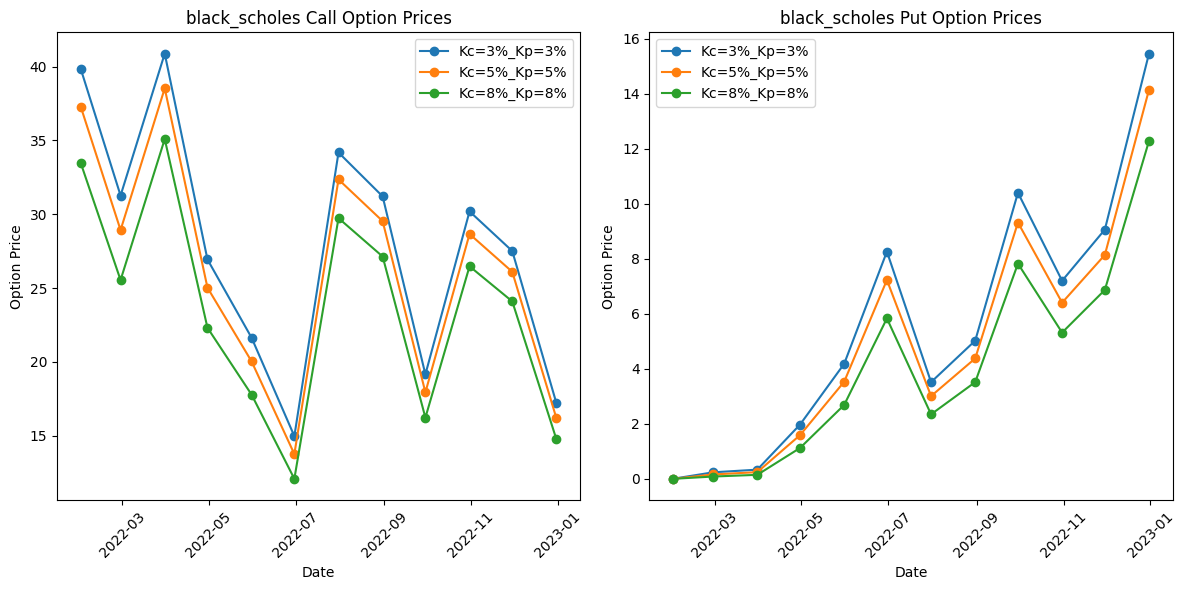

In [7]:
import matplotlib.pyplot as plt
# Add 'put' data to the 'forecasts' dictionary for each scenario

# Extract data for plotting (Call Options)
call_3 = list(forecasts['Kc=3%_Kp=3%']['call'].values())
call_5 = list(forecasts['Kc=5%_Kp=5%']['call'].values())
call_8 = list(forecasts['Kc=8%_Kp=8%']['call'].values())

# Extract data for plotting (Put Options)
put_3 = list(forecasts['Kc=3%_Kp=3%']['put'].values())
put_5 = list(forecasts['Kc=5%_Kp=5%']['put'].values())
put_8 = list(forecasts['Kc=8%_Kp=8%']['put'].values())

# Dates for x-axis
dates = list(forecasts['Kc=3%_Kp=3%']['call'].keys())
# Create two separate line charts for call and put options
plt.figure(figsize=(12, 6))

# Line chart for Call Options
plt.subplot(1, 2, 1)
plt.plot(date_range, call_3, label='Kc=3%_Kp=3%', marker='o')
plt.plot(date_range, call_5, label='Kc=5%_Kp=5%', marker='o')
plt.plot(date_range, call_8, label='Kc=8%_Kp=8%', marker='o')
plt.title('black_scholes Call Option Prices')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Option Price')
plt.legend()

# Line chart for Put Options
plt.subplot(1, 2, 2)
plt.plot(date_range, put_3, label='Kc=3%_Kp=3%', marker='o')
plt.plot(date_range, put_5, label='Kc=5%_Kp=5%', marker='o')
plt.plot(date_range, put_8, label='Kc=8%_Kp=8%', marker='o')
plt.title('black_scholes Put Option Prices')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Option Price')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
import pytz

# Function to calculate option price using the binomial model
def binomial_option_prices(S, K, T, r, sigma, N):
    dt = T / N  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Upward movement factor
    d = 1 / u  # Downward movement factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Initializing asset price at maturity
    asset_prices = np.zeros(N + 1)
    asset_prices[0] = S * d**N

    for i in range(1, N + 1):
        asset_prices[i] = asset_prices[i - 1] * u / d

    # Calculating option values at maturity
    call_option_values = np.maximum(asset_prices - K, 0)
    put_option_values = np.maximum(K - asset_prices, 0)

    # Discounting back to the present value
    for i in range(N, 0, -1):
        call_option_values = (p * call_option_values[1:i + 1] + (1 - p) * call_option_values[0:i]) * np.exp(-r * dt)
        put_option_values = (p * put_option_values[1:i + 1] + (1 - p) * put_option_values[0:i]) * np.exp(-r * dt)

    return call_option_values[0], put_option_values[0]

# Fetching Apple's stock closing price data for 2022
aapl = yf.Ticker("AAPL")
data_2022 = aapl.history(start="2022-12-12", end="2023-12-12")['Close']

# Setting up parameters for the binomial model
r = 0.12  # Risk-free interest rate (assumed)
sigma = data_2022.pct_change().dropna().std() * np.sqrt(252)  # Annualized volatility
timezone = pytz.timezone('America/New_York')  # Set the timezone
N = 100  # Number of steps

# Preparing the forecast structure
strike_percentages = [0.03, 0.05, 0.08]  # Different strike percentages
forecasts = {f"Kc={int(100*sp)}%_Kp={int(100*sp)}%": {"call": {}, "put": {}} for sp in strike_percentages}

# Calculate forecasts for each strike price
for month_end in pd.date_range(start="2022-12-31", end="2022-12-31", freq='M'):
    month_end_tz = timezone.localize(month_end)
    S = data_2022.loc[data_2022.index <= month_end_tz][-1]
    T = (month_end_tz - pd.Timestamp("2022-12-12", tz='America/New_York')) / pd.Timedelta(days=365)

    for strike_percent in strike_percentages:
        Kc = S * (1 + strike_percent)  # Call strike price
        Kp = S * (1 - strike_percent)  # Put strike price

        call_price, _ = binomial_option_prices(S, Kc, T, r, sigma, N)
        _, put_price = binomial_option_prices(S, Kp, T, r, sigma, N)

        key = f"Kc={int(100*strike_percent)}%_Kp={int(100*strike_percent)}%"
        forecasts[key]["call"][month_end_tz.strftime('%Y-%m')] = call_price
        forecasts[key]["put"][month_end_tz.strftime('%Y-%m')] = put_price

binomia_forecasts = forecasts
forecasts


{'Kc=3%_Kp=3%': {'call': {'2022-01': 4.927383710254521,
   '2022-02': 7.242760513864077,
   '2022-03': 10.066568480327286,
   '2022-04': 10.87182131808234,
   '2022-05': 11.81371139873957,
   '2022-06': 12.084924058120802,
   '2022-07': 15.758009976265358,
   '2022-08': 16.521876108176098,
   '2022-09': 15.526789322212004,
   '2022-10': 18.316664199074882,
   '2022-11': 18.682498521558028,
   '2022-12': 17.238477474540655},
  'put': {'2022-01': 4.615635896353734,
   '2022-02': 6.760603258799179,
   '2022-03': 9.340517262377672,
   '2022-04': 10.045638413129547,
   '2022-05': 10.871127872271508,
   '2022-06': 11.078969538692286,
   '2022-07': 14.393344638114561,
   '2022-08': 15.038598907211725,
   '2022-09': 14.087539976539114,
   '2022-10': 16.566148441816345,
   '2022-11': 16.84721615927787,
   '2022-12': 15.499531046994395}},
 'Kc=5%_Kp=5%': {'call': {'2022-01': 3.766922847505994,
   '2022-02': 6.069383551431932,
   '2022-03': 8.767905273587072,
   '2022-04': 9.645907621447234,
   '

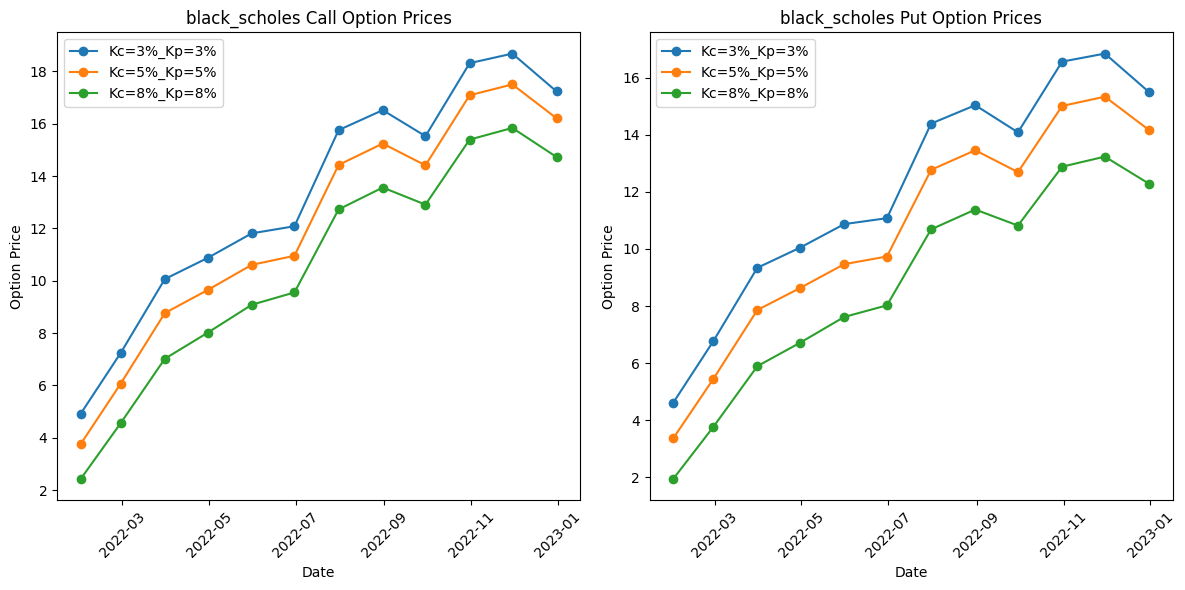

In [15]:
import matplotlib.pyplot as plt
# Add 'put' data to the 'forecasts' dictionary for each scenario
# Extract data for plotting (Call Options)
call_3 = list(forecasts['Kc=3%_Kp=3%']['call'].values())
call_5 = list(forecasts['Kc=5%_Kp=5%']['call'].values())
call_8 = list(forecasts['Kc=8%_Kp=8%']['call'].values())

# Extract data for plotting (Put Options)
put_3 = list(forecasts['Kc=3%_Kp=3%']['put'].values())
put_5 = list(forecasts['Kc=5%_Kp=5%']['put'].values())
put_8 = list(forecasts['Kc=8%_Kp=8%']['put'].values())

# Dates for x-axis
dates = list(forecasts['Kc=3%_Kp=3%']['call'].keys())
# Create two separate line charts for call and put options
plt.figure(figsize=(12, 6))

# Line chart for Call Options
plt.subplot(1, 2, 1)
plt.plot(date_range, call_3, label='Kc=3%_Kp=3%', marker='o')
plt.plot(date_range, call_5, label='Kc=5%_Kp=5%', marker='o')
plt.plot(date_range, call_8, label='Kc=8%_Kp=8%', marker='o')
plt.title('black_scholes Call Option Prices')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Option Price')
plt.legend()

# Line chart for Put Options
plt.subplot(1, 2, 2)
plt.plot(date_range, put_3, label='Kc=3%_Kp=3%', marker='o')
plt.plot(date_range, put_5, label='Kc=5%_Kp=5%', marker='o')
plt.plot(date_range, put_8, label='Kc=8%_Kp=8%', marker='o')
plt.title('black_scholes Put Option Prices')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Option Price')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
# 创建一个空字符串列表
months = []

# 使用循环将数字从2到12添加到列表中
for i in range(2, 13):
    # 将数字转换为字符串，并在需要时添加前导零
    month_str = str(i) if i >= 10 else "0" + str(i)
    
    # 将月份字符串添加到列表中
    months.append(month_str)

# 打印完整的键，将每个月份字符串与其拼接
for month in months:
    full_key = "[Kc=3%_Kp=3%']['call']['2022-" + month + '\']'
    print(full_key)


[Kc=3%_Kp=3%']['call']['2022-02']
[Kc=3%_Kp=3%']['call']['2022-03']
[Kc=3%_Kp=3%']['call']['2022-04']
[Kc=3%_Kp=3%']['call']['2022-05']
[Kc=3%_Kp=3%']['call']['2022-06']
[Kc=3%_Kp=3%']['call']['2022-07']
[Kc=3%_Kp=3%']['call']['2022-08']
[Kc=3%_Kp=3%']['call']['2022-09']
[Kc=3%_Kp=3%']['call']['2022-10']
[Kc=3%_Kp=3%']['call']['2022-11']
[Kc=3%_Kp=3%']['call']['2022-12']


In [32]:
import pandas as pd

# 2. 计算行权价格
# 根据执行价格百分比计算行权价格
current_stock_price = monthly_closing_prices['2022-01'].values[0]
execution_percentages = [0.03, 0.05, 0.08]  # 执行价格百分比

# 计算call期权的行权价格
call_strike_prices = [current_stock_price * (1 + p) for p in execution_percentages]

# 计算put期权的行权价格（可以与call期权不同）
put_strike_prices = [current_stock_price * (1 - p) for p in execution_percentages]

# 3. 执行策略
# Butterfly Options策略
low_strike_call = binomia_forecasts['Kc=3%_Kp=3%']['call']['2022-12']
high_strike_call = binomia_forecasts['Kc=8%_Kp=8%']['call']['2022-12']
middle_strike_calls = [
    binomia_forecasts['Kc=5%_Kp=5%']['call']['2022-12'],
    binomia_forecasts['Kc=5%_Kp=5%']['call']['2022-12']
]

low_strike_put = binomia_forecasts['Kc=3%_Kp=3%']['put']['2022-12']
high_strike_put = binomia_forecasts['Kc=8%_Kp=8%']['put']['2022-12']
middle_strike_puts = [
    binomia_forecasts['Kc=5%_Kp=5%']['put']['2022-12'],
    binomia_forecasts['Kc=5%_Kp=5%']['put']['2022-12']
]

# 计算Butterfly Options策略的成本（Call和Put期权一起计算）
butterfly_cost_call = high_strike_call + low_strike_call - 2 * sum(middle_strike_calls)
butterfly_cost_put = high_strike_put + low_strike_put - 2 * sum(middle_strike_puts)

# Straddle Options策略
call_option_price = binomia_forecasts['Kc=5%_Kp=5%']['call']['2022-12']
put_option_price = binomia_forecasts['Kc=5%_Kp=5%']['put']['2022-12']

# 计算Straddle Options策略的成本
straddle_cost = call_option_price + put_option_price

# 4. 计算盈利情况
closing_price_at_end_of_year = monthly_closing_prices['2022-12'].values[0]

# 考虑当前股价计算获利/亏损
# [max(P - A, 0) - X] + [max(P - B, 0) - Y] - [2 * max(P - C, 0) - 2 * Z]
butterfly_profit_call = max(closing_price_at_end_of_year - call_strike_prices[0], 0) + max(closing_price_at_end_of_year - call_strike_prices[2], 0) - max(closing_price_at_end_of_year - call_strike_prices[1], 0) - butterfly_cost_call
butterfly_profit_put = max(closing_price_at_end_of_year - put_strike_prices[0], 0) + max(closing_price_at_end_of_year - put_strike_prices[2], 0) - max(closing_price_at_end_of_year - put_strike_prices[1], 0) - butterfly_cost_put
straddle_profit_or_loss = max(closing_price_at_end_of_year - call_strike_prices[1], 0) - straddle_cost

# 5. 打印结果
print("Butterfly Options策略（Call期权）获利：", butterfly_profit_call)
print("Butterfly Options策略（Put期权）获利：", butterfly_profit_put)
print("Straddle Options策略盈利/亏损：", straddle_profit_or_loss)

Butterfly Options策略（Call期权）获利： 32.878541854918545
Butterfly Options策略（Put期权）获利： 28.888539148642202
Straddle Options策略盈利/亏损： -30.38084422944252


In [45]:
import pandas as pd

# 1. Create a list of months
months = []
for i in range(2, 13):
    month_str = str(i) if i >= 10 else "0" + str(i)
    months.append(month_str)

# 2. Calculate the strike prices
current_stock_price = monthly_closing_prices['2022-01'].values[0]
execution_percentages = [0.03, 0.05, 0.08]
call_strike_prices = [current_stock_price * (1 + p) for p in execution_percentages]
put_strike_prices = [current_stock_price * (1 - p) for p in execution_percentages]

# Iterate through each month to calculate results for each strategy
for month in months:
    # 3. Execute strategies
    low_strike_call = binomia_forecasts['Kc=3%_Kp=3%']['call']['2022-' + month]
    high_strike_call = binomia_forecasts['Kc=8%_Kp=8%']['call']['2022-' + month]
    middle_strike_calls = [
        binomia_forecasts['Kc=5%_Kp=5%']['call']['2022-' + month],
        binomia_forecasts['Kc=5%_Kp=5%']['call']['2022-' + month]
    ]

    low_strike_put = binomia_forecasts['Kc=3%_Kp=3%']['put']['2022-' + month]
    high_strike_put = binomia_forecasts['Kc=8%_Kp=8%']['put']['2022-' + month]
    middle_strike_puts = [
        binomia_forecasts['Kc=5%_Kp=5%']['put']['2022-' + month],
        binomia_forecasts['Kc=5%_Kp=5%']['put']['2022-' + month]
    ]

    butterfly_cost_call = high_strike_call + low_strike_call - 2 * sum(middle_strike_calls)
    butterfly_cost_put = high_strike_put + low_strike_put - 2 * sum(middle_strike_puts)

    call_option_price = binomia_forecasts['Kc=5%_Kp=5%']['call']['2022-' + month]
    put_option_price = binomia_forecasts['Kc=5%_Kp=5%']['put']['2022-' + month]
    straddle_cost = call_option_price + put_option_price

    # 4. Calculate profits/losses
    closing_price_at_end_of_month = monthly_closing_prices['2022-' + month].values[0]

    butterfly_profit_call = max(closing_price_at_end_of_month - call_strike_prices[0], 0) + max(closing_price_at_end_of_month - call_strike_prices[2], 0) - max(closing_price_at_end_of_month - call_strike_prices[1], 0) - butterfly_cost_call
    butterfly_profit_put = max(closing_price_at_end_of_month - put_strike_prices[0], 0) + max(closing_price_at_end_of_month - put_strike_prices[2], 0) - max(closing_price_at_end_of_month - put_strike_prices[1], 0) - butterfly_cost_put
    straddle_profit_or_loss = max(closing_price_at_end_of_month - call_strike_prices[1], 0) - straddle_cost

    # 5. Print the results
    print(f"Results for the month of {month}:")
    print("Profit from Butterfly Options Strategy (Call Options):", butterfly_profit_call)
    print("Profit from Butterfly Options Strategy (Put Options):", butterfly_profit_put)
    print("Profit/Loss from Straddle Options Strategy:", straddle_profit_or_loss)
    print()


Results for the month of 02:
Profit from Butterfly Options Strategy (Call Options): 12.474352212350492
Profit from Butterfly Options Strategy (Put Options): 15.71532234201485
Profit/Loss from Straddle Options Strategy: -11.507122767618606

Results for the month of 03:
Profit from Butterfly Options Strategy (Call Options): 17.983028013986683
Profit from Butterfly Options Strategy (Put Options): 26.63157379250865
Profit/Loss from Straddle Options Strategy: -16.6287766856929

Results for the month of 04:
Profit from Butterfly Options Strategy (Call Options): 19.698454474885565
Profit from Butterfly Options Strategy (Put Options): 17.766122938299915
Profit/Loss from Straddle Options Strategy: -18.27730024464156

Results for the month of 05:
Profit from Butterfly Options Strategy (Call Options): 21.538371717240295
Profit from Butterfly Options Strategy (Put Options): 19.379678833851145
Profit/Loss from Straddle Options Strategy: -20.076126519829185

Results for the month of 06:
Profit from 

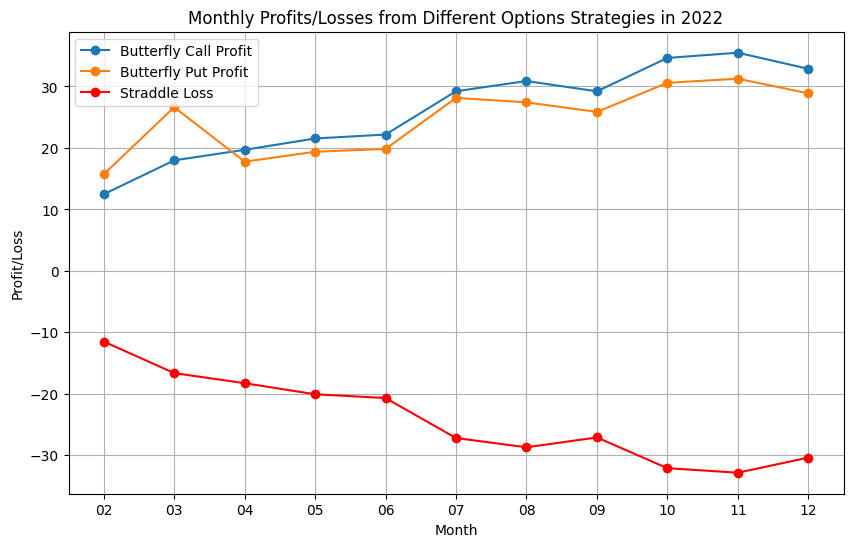

In [47]:
import matplotlib.pyplot as plt

# Data for each month
months = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(months, butterfly_call_profits, marker='o', label='Butterfly Call Profit')
plt.plot(months, butterfly_put_profits, marker='o', label='Butterfly Put Profit')
plt.plot(months, straddle_losses, marker='o', label='Straddle Loss', color='red')

plt.title('Monthly Profits/Losses from Different Options Strategies in 2022')
plt.xlabel('Month')
plt.ylabel('Profit/Loss')
plt.legend()
plt.grid(True)
plt.show()

